In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import Resize, Compose, ToTensor, Grayscale, ToPILImage,CenterCrop,GaussianBlur,Lambda,ColorJitter
from torchvision.utils import save_image
from io import BytesIO
import numpy as np
from ignite.metrics import SSIM, PSNR
import matplotlib.font_manager as fm

In [2]:
def ssim(input, target, data_range):
    ssim = SSIM(data_range=data_range)
    ssim.update((input, target))
    return ssim.compute()


def psnr(input, target, data_range):
    psnr = PSNR(data_range=data_range)
    psnr.update((input, target))
    return psnr.compute()

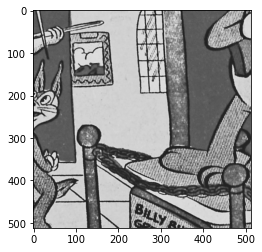

In [3]:
IMG = "./datasets/tests/comics.jpg"
image = Image.open(IMG).convert("L")
image = Compose([CenterCrop(512)])(image)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)

In [4]:
def randomJPEGcompression(image):
    qf = 10
    outputIoStream = BytesIO()
    image.save(outputIoStream, "JPEG", quality=qf, optimice=True)
    outputIoStream.seek(0)
    return Image.open(outputIoStream)

imgs = []

show = Compose([ToTensor()])(image)
imgs.append(show)
new = Compose([GaussianBlur((5, 5), sigma=(2, 4)),ToTensor()])(image)
imgs.append(new)
new2 = Compose([ColorJitter(brightness=0.8),ToTensor()])(image)
imgs.append(new2)
new3 = Compose([Lambda(randomJPEGcompression),ToTensor()])(image)
imgs.append(new3)

imgs[0] = imgs[0] * 255.0
imgs[1] = imgs[1] * 255.0
imgs[2] = imgs[2] * 255.0
imgs[3] = imgs[3] * 255.0


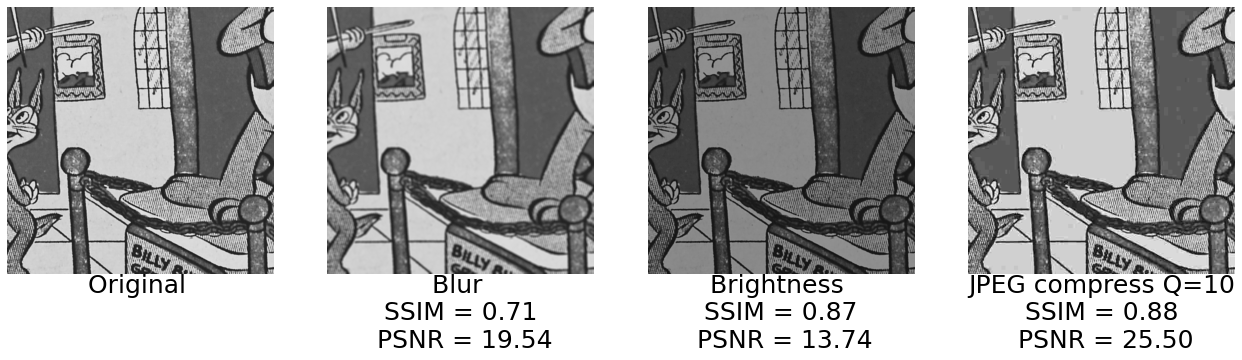

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(22, 6))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.imshow(img.squeeze(),cmap='gray', vmin=0, vmax=255)
    ax.axis('off')

y1=-0.3
y2=-0.3
fs = 25
axs[0].set_title('Original \n \n', y=y1,fontsize=fs)
axs[1].set_title(f'Blur \n SSIM = {ssim(imgs[0].unsqueeze(0) ,imgs[1].unsqueeze(0),255.0):.02f} \n PSNR = {psnr(imgs[0].unsqueeze(0),imgs[1].unsqueeze(0),255.0):.02f}', y=y2,fontsize=fs)
axs[2].set_title(f'Brightness \n SSIM = {ssim(imgs[0].unsqueeze(0) ,imgs[2].unsqueeze(0),255.0):.02f} \n PSNR = {psnr(imgs[0].unsqueeze(0),imgs[2].unsqueeze(0),255.0):.02f}',y=y2,fontsize=fs)
axs[3].set_title(f'JPEG compress Q=10\n SSIM = {ssim(imgs[0].unsqueeze(0) ,imgs[3].unsqueeze(0),255.0):.02f} \n PSNR = {psnr(imgs[0].unsqueeze(0),imgs[3].unsqueeze(0),255.0):.02f}',y=y2,fontsize=fs)

plt.show()
fig.tight_layout()
fig.savefig('ssim_psnr.pdf', bbox_inches = "tight")